In [1]:
import nltk

In [2]:
# download the nltk libraries (already installed here)
# nltk.download_shell()

In [3]:
# use a dataset from the UCI datasets (included) that has sms spam messages

messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [4]:
print(len(messages))

5574


In [5]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
# print first 10 messages and enumerate

for mess_no, message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [7]:
# read in the tab delimited file into pandas dataframe

import pandas as pd

messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t', names=['label','message'])

In [8]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# explore the data with stats and a few visualizations

messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
# use group by to use describe by the actual label to get better idea of differences between ham / spam messages

messages.groupby('label').describe()

message
label                                                          
ham   count                                                4825
      unique                                               4516
      top                                Sorry, I'll call later
      freq                                                   30
spam  count                                                 747
      unique                                                653
      top     Please call our customer service representativ...
      freq                                                    4

In [12]:
# explore for feature engineering - create a length column

messages['length'] = messages['message'].apply(len)

messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
# start visualizations

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

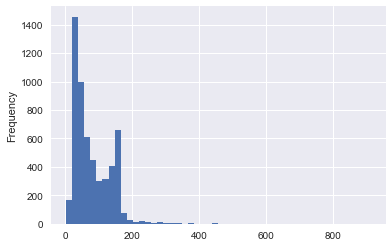

In [14]:
# explore the message length

messages['length'].plot.hist(bins=50)

In [16]:
# view the largest text message

messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [17]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023552A9B0F0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000023552AFCD30>], dtype=object)

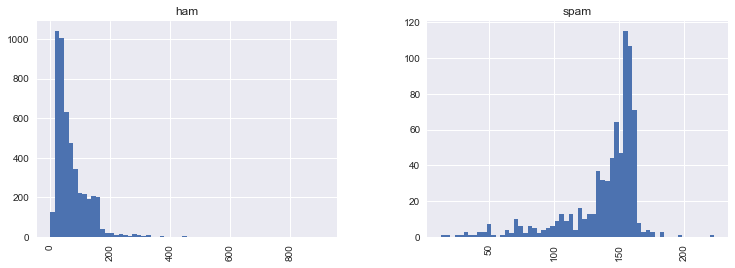

In [18]:
# use histogram to check for correlation between message length and label

messages.hist(column='length', by='label', bins=60, figsize=(12,4))

In [19]:


###  Part 2  ###   text pre-processing



In [20]:
# create bag of words by converting the messages into a series of vectors
# remove common words (stopwords)

import string

In [21]:
# remove punctuation

mess = 'Sample message! Notice: it has punctuation.'
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
nopunc = [c for c in mess if c not in string.punctuation]

nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [23]:
# import stopwords library

from nltk.corpus import stopwords

In [25]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [26]:
# method to join elements together, concatenated with the '' value between them (we are leaving blank to remove spaces)
nopunc = ''.join(nopunc)  

In [27]:
nopunc

'Sample message Notice it has punctuation'

In [28]:
# split nopun into a list
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [29]:
# use list comprehension to clean the list

clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [30]:
# now create a function doing the same as above that we can apply to our entire messages dataframe

def text_process(mess):
    """
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [31]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
# tokenize the messages

# see an example
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [33]:
# we did not go over stemming, which is reducing words to their basic 'stem' (ex. running, ran -> run)

# convert each of the messages into a vector that scikitlearn can understand

# Vectorization
Currently, we have the messages as lists of tokens (also known as lemmas) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.
Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:
1. Count how many times does a word occur in each message (Known as term frequency)
2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)
3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

In [34]:
# import Count Vectorizer

from sklearn.feature_extraction.text import CountVectorizer

In [35]:
# specify the 'analyzer' to be our own previously defined function

bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [36]:
# print number of words vectorized

print(len(bow_transformer.vocabulary_))

11425


In [37]:
# view message 4 to see what before / after bag of words looks like

mess4 = messages['message'][3]
print(mess4)

U dun say so early hor... U c already then say...


In [39]:
# view what bag of words looks like for message 4

bow4 = bow_transformer.transform([mess4])
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [40]:
print(bow4.shape)

(1, 11425)


In [41]:
# show a couple of the words by bag of words index

bow_transformer.get_feature_names()[4068]

'U'

In [42]:
bow_transformer.get_feature_names()[9554]

'say'

In [43]:


###  Part 3  ###  Finish bag of words, move on to TF-IDF



In [44]:
# let's see how the bag of words tranformer works on the entire messages corpus

messages_bow = bow_transformer.transform(messages['message'])

In [45]:
# show shape of the resulting sparse matrix

print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [46]:
# show amount of 'non zero occurrences'

messages_bow.nnz

50548

In [47]:
# check the sparsity  (copy from orig notebook)

sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [48]:
# show without the rounding function

sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [49]:
# term weights and normalization can now be done with TF-IDF - use from scikitlearn

from sklearn.feature_extraction.text import TfidfTransformer

In [50]:
# instantiate and fit the bag of words

tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [51]:
# test TF-IDF results on message 4

tfidf4 = tfidf_transformer.transform(bow4)

print(tfidf4)

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


In [52]:
# check TF-IDF value of a particular word

tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [53]:
# now convert entire messages bow corpus to a TF-IDF corpus

messages_tfidf = tfidf_transformer.transform(messages_bow)

In [54]:
# now we can train our spam / ham classifier - we will use naive bayes for classification

from sklearn.naive_bayes import MultinomialNB

# instantiate & fit the model

spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [55]:
# run the model to view prediction
messages['label'][3]

'ham'

In [56]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [57]:
# apply spam detect model on entire data set

all_pred = spam_detect_model.predict(messages_tfidf)

all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], 
      dtype='<U4')

In [58]:
# proper way to do this is with TRAIN_TEST_SPLIT

from sklearn.model_selection import train_test_split

# define train test split 

msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

In [60]:
# use scikitlearn 'pipeline' feature to basically create a macro / data pipeline of all the above steps so we can run

from sklearn.pipeline import Pipeline

In [65]:
# instantiate the pipeline object
# list of tuples that define steps to preprocess the data - copy of all steps we did up to now

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [66]:
# run our train data through the new pipeline

pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x0000023552DB6B70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [67]:
# now we can predict based on the pipeline

predictions = pipeline.predict(msg_test)

In [68]:
# import and run classification reports to view accuracy of the model

from sklearn.metrics import classification_report

print(classification_report(label_test,predictions))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1457
       spam       1.00      0.68      0.81       215

avg / total       0.96      0.96      0.96      1672



In [69]:
# try replacing the classifier used in the pipeline - we will just make another pipeline to test

from sklearn.ensemble import RandomForestClassifier

# re-create the pipeline now using Random Forest

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [70]:
# run our train data through the new pipeline

pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x0000023552DB6B70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])

In [71]:
print(classification_report(label_test,predictions))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1457
       spam       1.00      0.68      0.81       215

avg / total       0.96      0.96      0.96      1672

